<a href="https://colab.research.google.com/github/AKAS1012/Face_Detection/blob/master/MINIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.3'

In [4]:
mnist = pd.read_csv(r"/content/MNIST_Train.csv")

In [5]:
sen_col = mnist.iloc[4]

In [6]:
sen_col = sen_col.iloc[1:786,]

In [7]:
abc = np.array(sen_col)

In [8]:
abc = abc.reshape(28,28)

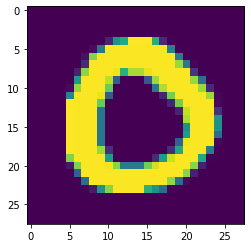

In [9]:
plt.imshow(abc)

ValueError: ignored

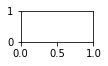

In [10]:
mnist1 = mnist.iloc[:, 1:786]
mnist1 = np.array(mnist)
for i in range(24):
  plt.subplot(6,4, i+1)
  plt.imshow(mnist1[i, :].reshape(28, 28))
  plt.axis('off')

In [11]:
mnist = pd.read_csv(r"/content/MNIST_Train.csv")

In [12]:
mnist_x = mnist.iloc[:, 1:786]

mnist_y = mnist.iloc[:, 0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(mnist_x, mnist_y, test_size = .2, random_state = 101)

In [15]:
mnist_x_train = np.array(mnist_x_train)

for i in range(len(mnist_x_train)):
  mnist_x_train[i,].reshape(28, 28)

In [16]:
mnist_x_test = np.array(mnist_x_test)

for i in range(len(mnist_x_test)):
  mnist_x_test[i,].reshape(28, 28)

In [17]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test)

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
mnist_y_train = np.array(mnist_y_train)

model.fit( mnist_x_train, mnist_y_train, epochs=70, validation_split=.2, batch_size=100 )

Epoch 1/70
269/269 [==============================] - 1s 5ms/step - loss: 0.6125 - accuracy: 0.8236 - val_loss: 0.3111 - val_accuracy: 0.9073
Epoch 2/70
269/269 [==============================] - 1s 4ms/step - loss: 0.2342 - accuracy: 0.9303 - val_loss: 0.2238 - val_accuracy: 0.9324
Epoch 3/70
269/269 [==============================] - 1s 5ms/step - loss: 0.1709 - accuracy: 0.9491 - val_loss: 0.1796 - val_accuracy: 0.9449
Epoch 4/70
269/269 [==============================] - 1s 5ms/step - loss: 0.1324 - accuracy: 0.9598 - val_loss: 0.1520 - val_accuracy: 0.9522
Epoch 5/70
269/269 [==============================] - 1s 5ms/step - loss: 0.1060 - accuracy: 0.9669 - val_loss: 0.1659 - val_accuracy: 0.9482
Epoch 6/70
269/269 [==============================] - 1s 5ms/step - loss: 0.0869 - accuracy: 0.9724 - val_loss: 0.1332 - val_accuracy: 0.9591
Epoch 7/70
269/269 [==============================] - 1s 5ms/step - loss: 0.0689 - accuracy: 0.9785 - val_loss: 0.1265 - val_accuracy: 0.9615
Epoch 

In [20]:
from sklearn.metrics import confusion_matrix

pred1 = model.predict_classes(mnist_x_test)

tab1 = confusion_matrix(pred1, mnist_y_test)
pred1 = model.predict_classes(mnist_x_test)
tab1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[776,   0,   3,   2,   2,   1,   0,   2,   1,   5],
       [  0, 938,   5,   2,   2,   2,   3,   0,   2,   1],
       [  1,   3, 835,   8,   0,   0,   0,   5,   3,   1],
       [  1,   2,   3, 830,   0,  10,   0,   1,   5,   3],
       [  0,   1,   2,   0, 801,   1,   1,   6,   1,   8],
       [  0,   0,   1,   4,   1, 711,   2,   1,   6,   3],
       [  5,   0,   1,   0,   3,   2, 818,   0,   6,   0],
       [  1,   2,   3,   3,   3,   1,   0, 854,   3,   8],
       [  5,   2,   3,   5,   2,   3,   0,   0, 790,   8],
       [  0,   0,   3,   5,   4,   2,   0,   4,   3, 840]])

In [22]:
tab1.diagonal().sum()/tab1.sum()*100

97.53571428571428